In [2]:
import numpy as np

# Training Data Set 준비
# x_data => 독립변수(공부시간)
# reshape(5,-1) => 행을 5개로 만들고 열은 남은 데이터를 가지고 알아서 채워라
x_data = np.array([1, 2, 3, 4, 5], dtype=np.float64).reshape(5,1)  # 5행 1열로 바꾼다.
# t_data => 종속변수, 정답데이터(시험점수)
t_data = np.array([3, 5, 7, 9, 11], dtype=np.float64).reshape(5,1)

# Weight & bias 정의
W = np.random.rand(1,1)   # 1행 1열짜리(값은 1개) ndarray를 만들고
                          # 0과 1사이의 균등분포에서 실수 난수를 추출
b = np.random.rand(1)     # 1차원 상수


# predict function (예측 함수, 모델, hypothesis)
def predict(x):
    y = np.dot(x,W) + b   # 행렬 곱 x가 앞에 W가 뒤에
    
    return y


# loss function
def loss_func(input_data):   # loss 함수는 w와 b의 함수
                             # input_data => [W b]
        
    input_W = input_data[0].reshape(1,1)   # W의 값을 가져와서 다시 2차원으로 생성
    input_b = input_data[1]
    
    # 예측값
    # 2차원 행렬 x_data와 input_W로 matrix 행렬 곱 연산을 한다.
    y = np.dot(x_data, input_W) + input_b
    
    # MSE를 구한다(평균제곱오차)
    return np.mean(np.power(t_data - y, 2))


# 다변수 함수에 대한 수치미분을 수행하는 함수
def numerical_derivative(f, x):   # x : ndarray [1.0  2.0]
                                  
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   # derivative_x : [0.0  0.0]
    
    # iterator를 이용해서 입력변수 x에 대한 편미분을 수행!
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        
        idx = it.multi_index
        tmp = x[idx]             # tmp : 1.0
        
        x[idx] = tmp + delta_x   # x : ndarray [1.0001  2.0]
        fx_plus_delta = f(x)
        
        x[idx] = tmp - delta_x   # x : ndarray [0.9999  2.0]
        fx_minus_delta = f(x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp             # x : ndarray [1.0  2.0]
        it.iternext()
        
    return derivative_x


# learning rate의 값을 설정해야 한다!
# learning rate는 우리가 설정해야 하는 값이다. 학습이 진행되는 과정을
# 살펴보면서 이 값을 적절하게 수정해야 한다! 초기에는 1e-4, 1e-3 정도로
# 설정해서 사용한다!
learning_rate = 1e-4


# 학습과정을 진행!
for step in range(300000):
    
    # .ravel() => 1차원으로 만든다.
    # np.concatenate() => 서로 다른 값을 연결해서 하나의 ndarray로 만든다.
    #                     연결할 값들을 튜플로 작성한다.
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)  # [W b]
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)
    
    W = W - derivative_result[0].reshape(1,1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b : {}, loss : {}'.format(W, b, loss_func(input_param)))

W : [[0.40433441]], b : [0.05274472], loss : 37.973943820661546
W : [[2.04713872]], b : [0.82981426], loss : 0.0052718065457720165
W : [[2.01709505]], b : [0.93828144], loss : 0.0006933374527726466
W : [[2.00619959]], b : [0.97761751], loss : 9.118635504611015e-05
W : [[2.00224831]], b : [0.9918829], loss : 1.1992647034066408e-05
W : [[2.00081536]], b : [0.9970563], loss : 1.5772489514513022e-06
W : [[2.00029569]], b : [0.99893246], loss : 2.0743662744444182e-07
W : [[2.00010723]], b : [0.99961285], loss : 2.7281650347260298e-08
W : [[2.00003889]], b : [0.9998596], loss : 3.5880280875008645e-09
W : [[2.0000141]], b : [0.99994908], loss : 4.718902778687397e-10


In [3]:
# 6시간 공부하면 몇점일지를 예측해보자!

predict_date = predict(np.array([[6]]))
print('6시간 공부했을 때 점수 : ', predict_date)

6시간 공부했을 때 점수 :  [[13.00001222]]


In [5]:
# Python으로 아주 간단한 Simple Linear Regression을 이용해 머신러닝을
# 구현해보았다
# sklearn(scikit-learn)
# pip install sklearn
import numpy as np
from sklearn import linear_model

# Training Data Set
x_data = np.array([1, 2, 3, 4, 5], dtype=np.float64).reshape(5,1)  # 5행 1열로 바꾼다.
# t_data => 종속변수, 정답데이터(시험점수)
t_data = np.array([3, 5, 7, 9, 11], dtype=np.float64).reshape(5,1)

# model 생성(Simple Linear Model) => 완성된 모델은 아니지만 일단 모델을 생성
model = linear_model.LinearRegression()

# model 학습
model.fit(x_data, t_data)

# 학습이 끝났으니.. 구한 W와 b를 출력해보자
print('W: {}, b: {}'.format(model.coef_, model.intercept_))   # W: [[2.]], b: [1.]

# model을 이용한 예측
print(model.predict(np.array([[6]])))   # [[13.]]

W: [[2.]], b: [1.]
[[13.]]


In [17]:
# Ozone량 예측하는 모델을 만들어보자!
# 데이터는 구글 드라이브에 공유된 CSV 파일을 이용하자
# Python 구현부터 해보자!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

################################################
# 다변수 함수에 대한 수치미분을 수행하는 함수
def numerical_derivative(f, x):   # x : ndarray [1.0  2.0]
                                  
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   # derivative_x : [0.0  0.0]
    
    # iterator를 이용해서 입력변수 x에 대한 편미분을 수행!
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        
        idx = it.multi_index
        tmp = x[idx]             # tmp : 1.0
        
        x[idx] = tmp + delta_x   # x : ndarray [1.0001  2.0]
        fx_plus_delta = f(x)
        
        x[idx] = tmp - delta_x   # x : ndarray [0.9999  2.0]
        fx_minus_delta = f(x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp             # x : ndarray [1.0  2.0]
        it.iternext()
        
    return derivative_x
################################################

# Raw Data Set Loading
df = pd.read_csv('../data/ozone.csv')
# display(df.head())
# display(df.info())

# Ozone(오존량) : 종속변수
# Solar.R(태양광 세기), Wind(바람), Temp(온도) : 독립변수
# 우리는 지금 Simple Linear Regression을 하고 있기 때문에 독립변수 1개만 사용.
# => 3개의 독립변수 중 Temp만 사용한다.
# 온도에 따른 오존량 예측 모델을 만들어보자!

training_data = df[['Ozone', 'Temp']]
# display(training_data)
# print(training_data.shape)   # (153, 2)

# 데이터에 결치값이 존재한다
# print(training_data.info())
# Missing Value(결치값)를 삭제하는 방법 (데이터가 충분히 많을 때 좋다)
# Missing Value(결치값)를 다른 값으로 대체 (데이터가 많이 없으면)
# 여기서는 결치값을 삭제해서 진행해보자.
training_data.dropna(how='any',
                     inplace=True)   # how='any' : 결치가 존재하는 행을 삭제
# training_data.info()

# Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# Weight, bias
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function
def loss_func(input_data):
    W = input_data[0].reshape(1,1)
    b = input_data[1]
    
    y = np.dot(x_data,W) + b
    return np.mean(np.power(t_data-y, 2))

# predict
def predict(x):
    y = np.dot(x,W) + b
    return y

# learning_rate
learning_rate = 1e-4

# 반복 학습
for step in range(300000):
    
    # .ravel() => 1차원으로 만든다.
    # np.concatenate() => 서로 다른 값을 연결해서 하나의 ndarray로 만든다.
    #                     연결할 값들을 튜플로 작성한다.
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)  # [W b]
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)
    
    W = W - derivative_result[0].reshape(1,1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b : {}, loss : {}'.format(W, b, loss_func(input_param)))

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32296\4255720606.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(how='any',


W : [[0.59322117]], b : [0.60032352], loss : 874.9491592390235
W : [[0.71636763]], b : [-11.6936151], loss : 818.056672814215
W : [[0.85899163]], b : [-22.96318969], loss : 775.6888337788567
W : [[0.98973618]], b : [-33.29409799], loss : 740.08487570721
W : [[1.10959074]], b : [-42.76452345], loss : 710.1649680753334
W : [[1.21946237]], b : [-51.44613747], loss : 685.0216716223861
W : [[1.32018256]], b : [-59.40464182], loss : 663.8924166693932
W : [[1.41251356]], b : [-66.70026578], loss : 646.1363751852473
W : [[1.49715412]], b : [-73.38822206], loss : 631.2150251476377
W : [[1.57474479]], b : [-79.51912455], loss : 618.6758177380223


In [18]:
# 학습 종료 후 예측 (Temp : 62)
predict_data = predict(np.array([[62]]))
print('온도가 62일 때 오존량 : {}'.format(predict_data))  # [[16.90477881]]

온도가 62일 때 오존량 : [[16.90477881]]


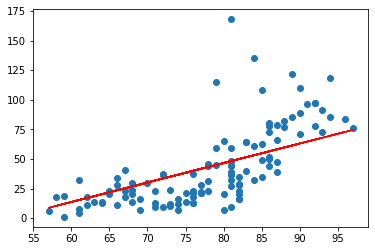

In [20]:
# 그래프로 표현해보자!
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), x_data.ravel()*W.ravel() + b, color='r')
plt.show()

sklearn으로 구한 온도가 62도 일 때의 오존량 : [[3.58411393]]


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32296\3534395391.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(how='any',


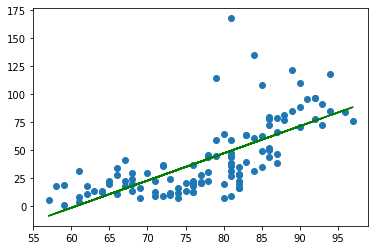

In [23]:
# 같은 데이터로 sklearn을 이용해서 구현해보자!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv('../data/ozone.csv')
training_data = df[['Ozone', 'Temp']]
training_data.dropna(how='any',
                     inplace=True)   # how='any' : 결치가 존재하는 행을 삭제

# Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# model 생성
model = linear_model.LinearRegression()

# model 학습
model.fit(x_data, t_data)

# 예측
result = model.predict(np.array([[62]]))
print('sklearn으로 구한 온도가 62도 일 때의 오존량 : {}'.format(result))
# [[3.58411393]]

# 그래프 표현
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(),
         x_data.ravel()*model.coef_.ravel() + model.intercept_, color='g')
plt.show()